# Sistema discreto con múltiples grados de libertad

© 2020 Víctor A. Bettachini  
Mecánica General  
Departamento de Ingeniería e Investigación Tecnológica  
Universidad Nacional de La Matanza   

![](ambos.png "UNLaM | DIIT")  

---

## Con un grado de libertad

![](shabana_fig_1_11.png)

Una $\vec{F}(t)$ se aplica a un sistema caracterizado por

- m : masa
- c : coeficiente de de una fuerza de amortiguación lineal con la velocidad
- k : coeficiente de rigidez (stiffness) de un resorte que proveé una fuerza de Hooke

Para que la fuerza del resorte sea función del $x$ de la figura, este se mide desde la longitud de reposo del resorte.

In [1]:
# biblioteca de cálculo simbólico
import sympy as sym
import sympy.physics.mechanics as mech
mech.init_vprinting() # notación con puntos para derivadas temporales

In [2]:
t = sym.symbols('t') # tiempo
m, k, c = sym.symbols('m, k, c', positive = True)
x, F = mech.dynamicsymbols('x F')
N = sym.physics.vector.ReferenceFrame('N') # marco referencial N en coordenadas cartesianas
r_m = x* N.x

unMedio = sym.Rational(1,2) # Rational: fracción de enteros, alternativamente podría haberse usado 0.5 
v_m = r_m.diff(t,N)
T = unMedio* m* v_m.dot(v_m)
V = unMedio* k* r_m.dot(r_m)

L = T- V
sym.Eq( sym.Symbol('\mathcal{L}') , L.simplify())

Las fuerzas no conservativas actuando sobre el sistema.

![](shabana_fig_1_11b.png)

In [3]:
f = F* N.x - c* r_m.diff(t,N)
f

Dado que la coordenada generalizada utilizada es la componente vectorial, su fuerza generalizada correspondiente es la resultante de fuerzas
$$
\delta W = f \delta x = Q_x \delta x .
$$

In [4]:
x_Q = sym.Eq(sym.Symbol('Q_x'), f.dot(N.x))
x_Q

Siendo la ecuación de Euler-Lagrange

$$
\frac{\mathrm{d}}{\mathrm{d} t} \frac{\partial}{\partial \dot{q_i}} \mathcal{L}  - \frac{\partial}{\partial q_i} \mathcal{L} = Q_i,
$$
resulta para este caso

In [5]:
x_dtdqp = L.diff(x.diff(t) ).diff(t)
x_dq = L.diff(x)
x_EL_sinNoConservativas = x_dtdqp - x_dq
x_EL = sym.Eq(x_EL_sinNoConservativas.simplify(), x_Q.rhs)
x_EL

Para el análisis de oscilaciones se suele escribir la ecuación de la dinámica dejando la fuerza forzante de lado.

In [6]:
sym.Eq( sym.solve(x_EL, F)[0] , F) 

## Dos grados de libertad

![](shabana_fig_2_1b.png)

En este sistema nuevamente las $x_i$ se miden desde la posición en que la longitud de los resortes sea la de reposo, es decir en la cual no ejercen fuerzas. 
Evidentemente se requiere de dos coordenas generalizadas $x_1, x_2$ para su descripción.

In [7]:
t = sym.symbols('t') # tiempo
m1, m2, k1, k2, c1, c2 = sym.symbols('m_1 m_2 k_1 k_2 c_1 c_2', positive = True)
x1, x2, F1, F2 = mech.dynamicsymbols('x_1 x_2 F_1 F_2')
N = sym.physics.vector.ReferenceFrame('N') # marco referencial N en coordenadas cartesianas
r_m1 = x1* N.x
r_m2 = x2* N.x

unMedio = sym.Rational(1,2) # Rational: fracción de enteros, alternativamente podría haberse usado 0.5 
v_m1 = r_m1.diff(t,N)
v_m2 = r_m2.diff(t,N)
T = unMedio* (m1* v_m1.dot(v_m1) + m2* v_m2.dot(v_m2) )
l_resorte2 = r_m2 - r_m1
V = unMedio* (k1* r_m1.dot(r_m1) + k2* l_resorte2.dot(l_resorte2) )

L = T- V
sym.Eq( sym.Symbol('\mathcal{L}') , L.simplify())

Al analizar las fuerzas no conservativas hay que considerar que los amortiguadores responden a las velocidades de ambas $m_i$.

In [8]:
f1 = F1* N.x - c1* r_m1.diff(t,N) - c2* (r_m1.diff(t,N)- r_m2.diff(t,N) )
f2 = F2* N.x - c2* (r_m2.diff(t,N) - r_m1.diff(t,N) )
x1_Q = sym.Eq(sym.Symbol('Q_x_1'), f1.dot(N.x))
x2_Q = sym.Eq(sym.Symbol('Q_x_2'), f2.dot(N.x))
x1_Q, x2_Q

In [9]:
x1_dtdqp = L.diff(x1.diff(t) ).diff(t)
x1_dq = L.diff(x1)
x1_EL = sym.Eq(x1_dtdqp - x1_dq , x1_Q.rhs)

x2_dtdqp = L.diff(x2.diff(t) ).diff(t)
x2_dq = L.diff(x2)
x2_EL_sinNoConservativas = x2_dtdqp - x2_dq
x2_EL = sym.Eq(x2_dtdqp - x2_dq, x2_Q.rhs)

In [10]:
sym.Eq( sym.solve(x1_EL, F1)[0].simplify() , F1) 

In [11]:
sym.Eq( sym.solve(x2_EL, F2)[0].simplify() , F2) 

Aquí las dos ecuaciones, cada una en la forma

$$
m \ddot{x} + c \dot{x} + k x = F, 
$$
que pueden escribirse en conjunto en función de un vector de coordenadas generalizadas $\vec{q}$ en la forma matrical

$$
M \ddot{\vec{q}} + C \dot{\vec{q}} + K \vec{q} = \vec{F} 
$$

### Matrices $M$, $C$, $K$

In [12]:
muletos_K={
    x1 : sym.Symbol('x_1'),
    x2 : sym.Symbol('x_2'),
} # reemplazando por símbolos que no dependen del tiempo las derivadas son 0
sistema = [x1_EL, x2_EL ]
sistema_subs = [elemento.subs(muletos_K).simplify() for elemento in sistema]
simbolos = [x1, x2]
simbolos_subs = [elemento.subs(muletos_K).simplify() for elemento in simbolos]
K, f = sym.linear_eq_to_matrix(sistema_subs, simbolos_subs)
K = (-1)* K
K, (-1)*f

⎛⎡k₁ + k₂  -k₂⎤  ⎡F₁⎤⎞
⎜⎢            ⎥, ⎢  ⎥⎟
⎝⎣  -k₂    k₂ ⎦  ⎣F₂⎦⎠

Aquí se multiplicó la matriz $K$ por $-1$.
Se verifica en la $\vec{F}$ que los signos sean iguales.

In [13]:
muletos_C={
    x1 : 0,
    x2 : 0,
    x1.diff(t) : sym.Symbol('dx1'),
    x2.diff(t) : sym.Symbol('dx2'),
}
sistema = [x1_EL, x2_EL ]
sistema_subs = [elemento.subs(muletos_C).simplify() for elemento in sistema]
simbolos = [x1.diff(t), x2.diff(t)]
simbolos_subs = [elemento.subs(muletos_C).simplify() for elemento in simbolos]
C, f = sym.linear_eq_to_matrix(sistema_subs, simbolos_subs)
C, f

⎛⎡c₁ + c₂  -c₂⎤  ⎡F₁ ⎤⎞
⎜⎢            ⎥, ⎢   ⎥⎟
⎝⎣  c₂     -c₂⎦  ⎣-F₂⎦⎠

mAquí los signos en $\vec{F}$ no son iguales, por lo que se aplica $-1$ a una fila en particular de la matriz $C$.

In [14]:
fila_invertir = 1
C[fila_invertir,:] = C[fila_invertir,:]* (-1)
f[fila_invertir] = f[fila_invertir]* (-1)
C, f

⎛⎡c₁ + c₂  -c₂⎤  ⎡F₁⎤⎞
⎜⎢            ⎥, ⎢  ⎥⎟
⎝⎣  -c₂    c₂ ⎦  ⎣F₂⎦⎠

In [15]:
muletos_M={
    x1 : 0,
    x2 : 0,
    x1.diff(t) : 0,
    x2.diff(t) : 0,
    x1.diff(t,2) : sym.Symbol('ddx1'),
    x2.diff(t,2) : sym.Symbol('ddx2'),
}
sistema = [x1_EL, x2_EL ]
sistema_subs = [elemento.subs(muletos_M).simplify() for elemento in sistema]
simbolos = [x1.diff(t,2), x2.diff(t,2)]
simbolos_subs = [elemento.subs(muletos_M).simplify() for elemento in simbolos]
M, f = sym.linear_eq_to_matrix(sistema_subs, simbolos_subs)
M = (-1)* M
M, (-1)*f

⎛⎡m₁  0 ⎤  ⎡F₁⎤⎞
⎜⎢      ⎥, ⎢  ⎥⎟
⎝⎣0   m₂⎦  ⎣F₂⎦⎠

In [16]:
M, C, K

⎛⎡m₁  0 ⎤  ⎡c₁ + c₂  -c₂⎤  ⎡k₁ + k₂  -k₂⎤⎞
⎜⎢      ⎥, ⎢            ⎥, ⎢            ⎥⎟
⎝⎣0   m₂⎦  ⎣  -c₂    c₂ ⎦  ⎣  -k₂    k₂ ⎦⎠

## Frecuencias naturales de oscilación

### Un $\omega$ si hay un grado de libertad
Un sistema con un único grado de libertad no es afectado por $F$ o $c$

$$
\begin{aligned}
m \ddot{x} + c \dot{x} + k x &= F\\
m \ddot{x} + k x &= 0
\end{aligned},
$$
apartado de su equilibrio si oscilará por siempe en una $\omega$ en función de $k$ y $m$.
Se asume una solución armónica $x = A \operatorname{e}^{at}$ de amplitud $\tilde{A}$ y frecuencia (angular) $a$ no nulas.

$$
\begin{aligned}
m \ddot{x} + k x &= 0\\
m \tilde{A} a^2 \operatorname{e}^{at} + k \tilde{A} \operatorname{e}^{at} &= 0\\
\tilde{A} (m a^2 + k) \operatorname{e}^{at} &= 0
\end{aligned},
$$
obliga a que $a = \pm \sqrt{- \frac{k}{m}} = \pm i \sqrt{\frac{k}{m}}$, y habrá por tanto dos soluciones que se suman linealmente para obtener la solución general

$$
\begin{aligned}
x &= A_1 \operatorname{e}^{i \sqrt{\frac{k}{m}} t} + A_2 \operatorname{e}^{-i \sqrt{\frac{k}{m}} t}\\
x &= A_1 \operatorname{e}^{i \omega t} + A_2 \operatorname{e}^{- i \omega t}\\
x &= A \cos{(\omega t + \phi_0)}\\
x &= x(0) \cos{(\omega t)} +  \frac{\dot{x}(0)}{\omega} \sin{(\omega t)}
\end{aligned}.
$$
El como llegar a las últimas dos expresión se vió en `penduloNewton.ipynb` en la clase `03Lagrangiano`. 

### Varios $\omega$ para varios grados de libertad
Si el sistema necesita más coordenadas generalizadas para describir su dinámica $q_i$ también tendrá sendas $\omega_i$ determinadas por los elementos de las matrices $K$ y $M$.
Proponiendo idéntica solución donde $\vec{q} = \vec{A} \operatorname{e}^{i \omega t}$, es decir todos los elementos de $\vec{q}$ oscilan al unísono con $\omega$ en las amplitudes $\vec{A}$

$$
\begin{aligned}
M \ddot{\vec{q}} + K \vec{q} &= 0\\
- M \omega^2 \vec{A} \operatorname{e}^{i \omega t} + K \tilde{A} \operatorname{e}^{i \omega t} &= 0\\
(-M \omega^2 + K) \vec{A} \operatorname{e}^{i \omega t} &= 0
\end{aligned}.
$$
Esto solo tiene solucíon no trivial ($\vec{A} \neq 0 $) si lo que está entre paréntesis es una **matriz singular** que lo será solo y solo sí su **determinante es nulo**

$$
\left| K - \omega^2 M \right| =0
$$
De hecho

$$
(K - \omega^2 M) \vec{A} = 0,
$$
es un problema de **autovalores** $\omega^2$, y **autovectores** $\vec{A}$. 

### Frecuencias $\omega$ y amplitudes $\vec{A}$ del sistema del ejemplo 
El vector de coordenas generalizas es

In [17]:
vecq = sym.Matrix([[x1],[x2]])
sym.Eq(sym.Symbol(r'\vec{q}'), vecq, evaluate=False)

          ⎡x₁⎤
\vec{q} = ⎢  ⎥
          ⎣x₂⎦

por lo que para este caso

$$
(K - \omega^2 M) \vec{A} = 0,
$$

resulta ser

In [18]:
omega, a_1, a_2 = sym.symbols('omega a_1 a_2')
parentesis = K - omega**2* M
vecA = sym.Eq(sym.Symbol(r'\vec{A}'), sym.Matrix([[a_1],[a_2]]), evaluate=False)
sym.Eq(sym.MatMul(parentesis, vecA.rhs), 0, evaluate=False)

⎡              2            ⎤         
⎢k₁ + k₂ - m₁⋅ω      -k₂    ⎥ ⎡a₁⎤    
⎢                           ⎥⋅⎢  ⎥ = 0
⎢                          2⎥ ⎣a₂⎦    
⎣      -k₂        k₂ - m₂⋅ω ⎦         

Despejando $\omega$ del determinante igualado a cero

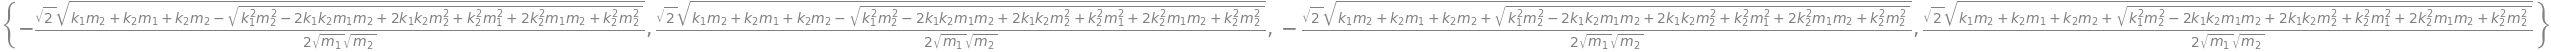

In [19]:
determinante = sym.Eq(sym.det(parentesis),0)
omegas = sym.solveset(determinante, omega)
omegas

Las soluciones negativas no tienen aplicación física, pues no hay $\omega < 0$.
Se suele ordenar las $\omega_i$ de menor a mayor. Es fácil ver cual es la menor por el signo en el discriminante dentro de la raíz.

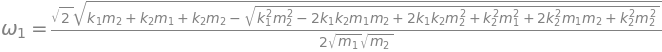

In [20]:
omega_1 = sym.Eq(sym.Symbol('omega_1'), list(omegas)[3])
omega_1

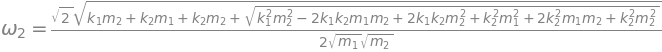

In [21]:
omega_2 = sym.Eq(sym.Symbol('omega_2'), list(omegas)[1])
omega_2

## Amplitud de la oscilación con cada $\omega$

Los autovalares $\omega^2 $ se reemplazan en $K- \omega^2 M$ para obtener los correspondientes autovectores.
Estos darán una relación de los componentes del vector de amplitudes $\vec{A}$.

In [22]:
omega_i, a_i1, a_i2 = sym.symbols('omega_i a_{i1} a_{i2}')
veca_i = sym.Matrix([[a_i1],[a_i2]])
sym.Eq(sym.MatMul(K - omega_i**2* M, veca_i), 0, evaluate=False)

⎡               2             ⎤             
⎢k₁ + k₂ - m₁⋅ωᵢ       -k₂    ⎥ ⎡a_{i1}⎤    
⎢                             ⎥⋅⎢      ⎥ = 0
⎢                            2⎥ ⎣a_{i2}⎦    
⎣      -k₂         k₂ - m₂⋅ωᵢ ⎦             

### Para $\omega_1$

In [23]:
ceros = sym.Matrix([[0],[0]])
a_11, a_12 = sym.symbols('a_{11} a_{12}')
vecA1 = sym.Matrix([[a_11],[a_12]])
sym.Eq(sym.MatMul(parentesis.subs(omega, omega_1.lhs), vecA1), ceros, evaluate=False)

⎡               2             ⎤               
⎢k₁ + k₂ - m₁⋅ω₁       -k₂    ⎥ ⎡a_{11}⎤   ⎡0⎤
⎢                             ⎥⋅⎢      ⎥ = ⎢ ⎥
⎢                            2⎥ ⎣a_{12}⎦   ⎣0⎦
⎣      -k₂         k₂ - m₂⋅ω₁ ⎦               

In [24]:
sistema_1 = parentesis.subs(omega, omega_1.rhs)* vecA1
sym.Eq(sistema_1, ceros, evaluate=False)

⎡       ⎛                                     ________________________________
⎢       ⎜                                    ╱   2   2                        
⎢       ⎜          k₁⋅m₂ + k₂⋅m₁ + k₂⋅m₂ - ╲╱  k₁ ⋅m₂  - 2⋅k₁⋅k₂⋅m₁⋅m₂ + 2⋅k₁⋅
⎢a_{11}⋅⎜k₁ + k₂ - ───────────────────────────────────────────────────────────
⎢       ⎝                                                          2⋅m₂       
⎢                                                                             
⎢                      ⎛                                ______________________
⎢                      ⎜                               ╱   2   2              
⎢                      ⎜     k₁⋅m₂ + k₂⋅m₁ + k₂⋅m₂ - ╲╱  k₁ ⋅m₂  - 2⋅k₁⋅k₂⋅m₁⋅
⎢  -a_{11}⋅k₂ + a_{12}⋅⎜k₂ - ─────────────────────────────────────────────────
⎣                      ⎝                                                     2

_________________________________________⎞            ⎤      
     2     2   2       2           2   2 ⎟            ⎥      
k₂⋅m₂ 

De cualquiera de las dos igualdades puede obtenerse una relación entre $a_{11}$ y $a_{12}$.

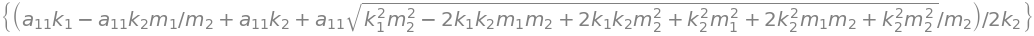

In [25]:
sistema_1_lista = [sistema_1[0].expand(), sistema_1[1].expand()]
a_12_sol1 = sym.solveset(sistema_1_lista[0], a_12)
a_12_sol1

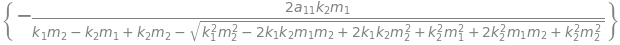

In [26]:
a_12_sol2 = sym.solveset(sistema_1_lista[1], a_12)
a_12_sol2

La soluciones parecen distintas, pero puede probarse que son equivalentes ensayando con magnitudes de fantasía.

In [27]:
parametros_test = {
    m1 : 1,
    m2 : 2,
    k1 : 3,
    k2 : 4,
    c1 : 5,
    c2 : 6,
} # valores de fantasía

In [28]:
a_12_sol1.subs(parametros_test).args[0].simplify()

In [29]:
a_12_sol2.subs(parametros_test).args[0].simplify().simplify()

Entonces la amplitud que correspende a $\omega_1$ es

In [30]:
amplitud_1_con = sym.Matrix([a_11,  a_12_sol1.args[0].simplify() ])
A_1 = sym.Eq(sym.Symbol(r'\vec{A}_1'), sym.MatMul(a_11, amplitud_1_con/a_11), evaluate=False)
A_1

                  ⎡                                                 1         
                  ⎢                                                           
                  ⎢                           ________________________________
\vec{A}₁ = a_{11}⋅⎢                          ╱   2   2                        
                  ⎢-k₂⋅m₁ + m₂⋅(k₁ + k₂) + ╲╱  k₁ ⋅m₂  - 2⋅k₁⋅k₂⋅m₁⋅m₂ + 2⋅k₁⋅
                  ⎢───────────────────────────────────────────────────────────
                  ⎣                                              2⋅k₂⋅m₂      

                                         ⎤
                                         ⎥
_________________________________________⎥
     2     2   2       2           2   2 ⎥
k₂⋅m₂  + k₂ ⋅m₁  + 2⋅k₂ ⋅m₁⋅m₂ + k₂ ⋅m₂  ⎥
─────────────────────────────────────────⎥
                                         ⎦

### Para $\omega_2$

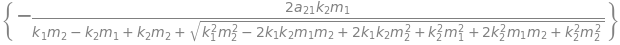

In [31]:
a_21, a_22 = sym.symbols('a_{21} a_{22}')
vecA2 = sym.Matrix([[a_21],[a_22]])
sistema_2 = parentesis.subs(omega, omega_2.rhs)* vecA2
sistema_2_lista = [fila.expand() for fila in sistema_2]
a_22_sol2 = sym.solveset(sistema_2_lista[1], a_22)
a_22_sol2

In [32]:
amplitud_2_con = sym.Matrix([a_21, a_22_sol2.args[0].simplify() ])
A_2 = sym.Eq(sym.Symbol(r'\vec{A}_2'), sym.MatMul(a_21, amplitud_2_con/a_21), evaluate=False)
A_2

                  ⎡                                                 1         
                  ⎢                                                           
                  ⎢                                             -2⋅k₂⋅m₁      
\vec{A}₂ = a_{21}⋅⎢───────────────────────────────────────────────────────────
                  ⎢                           ________________________________
                  ⎢                          ╱   2   2                        
                  ⎣k₁⋅m₂ - k₂⋅m₁ + k₂⋅m₂ + ╲╱  k₁ ⋅m₂  - 2⋅k₁⋅k₂⋅m₁⋅m₂ + 2⋅k₁⋅

                                         ⎤
                                         ⎥
                                         ⎥
─────────────────────────────────────────⎥
_________________________________________⎥
     2     2   2       2           2   2 ⎥
k₂⋅m₂  + k₂ ⋅m₁  + 2⋅k₂ ⋅m₁⋅m₂ + k₂ ⋅m₂  ⎦

## Solución general para la dinámica

Antes de obtener una expresión es útil analizar que dice la amplitud relativa para cada $\omega$.
A modo ilustrativo se utilizarán los valores de fantasía anteriormente introducidos.

In [33]:
A_1.rhs.subs(parametros_test), A_2.rhs.subs(parametros_test)

⎛       ⎡   1   ⎤         ⎡    1     ⎤⎞
⎜       ⎢       ⎥         ⎢          ⎥⎟
⎜a_{11}⋅⎢5   √57⎥, a_{21}⋅⎢   -8     ⎥⎟
⎜       ⎢─ + ───⎥         ⎢──────────⎥⎟
⎝       ⎣8    8 ⎦         ⎣10 + 2⋅√57⎦⎠

Con estos parámtros se vé que con $\omega_1$ ambos $x_i$ se mueven hacia el mismo lado, pero el $x_2$ lo hace con mayor amplitud que $x_1$.
En tanto que con $\omega_2 > \omega_1$ al moverse $x_2$ a la derecha, $x_1$ lo hace hacía la izquierda y con una amplitud mayor.
La frecuencia más baja corresponde **siempre** al que presenta menos _inversiones_ en el sentido de oscilación las componentes del sistema.

Estas distintas formas de oscilar reciben el nombre de **modos normales de oscilación** y el sistema tendrá tantas de ellas como **frecuencias características**, es decir el número de grados de libertad.

In [34]:
phi_1, phi_2 = sym.symbols(r'phi_1 phi_2')
vecX_sol_lhs = sym.Eq(vecq, A_1.lhs * sym.cos(omega_1.lhs* t + phi_1 ) + A_2.lhs * sym.cos(omega_2.lhs* t + phi_2), evaluate=False)
vecX_sol_lhs

⎡x₁⎤                                                    
⎢  ⎥ = \vec{A}₁⋅cos(ω₁⋅t + φ₁) + \vec{A}₂⋅cos(ω₂⋅t + φ₂)
⎣x₂⎦                                                    

Para hallar la solución general se suman las dos soluciones y se determinan los coeficientes $a_{11}, a_{21}, \phi_1, \phi_2$ a partir de condiciones iniciales.

In [35]:
vecX_sol_rhs = sym.Eq(vecq, A_1.rhs * sym.cos(omega_1.rhs* t + phi_1 ) + A_2.rhs * sym.cos(omega_2.rhs* t + phi_2), evaluate=False)
vecX_sol_rhs

       ⎡                                                                 ⎛    
       ⎢                                                                 ⎜    
       ⎢                                                                 ⎜    
       ⎢                                                                 ⎜    
       ⎢                                                       a_{11}⋅cos⎜φ₁ +
       ⎢                                                                 ⎜    
       ⎢                                                                 ⎝    
       ⎢                                                                      
⎡x₁⎤   ⎢                                                                      
⎢  ⎥ = ⎢                                                                      
⎣x₂⎦   ⎢       ⎛                           ___________________________________
       ⎢       ⎜                          ╱   2   2                           
       ⎢a_{11}⋅⎝-k₂⋅m₁ + m₂⋅(k₁ + k₂) + ╲╱  k₁ ⋅m₂  

## Condiciones iniciales

Si el sistema partió del reposo, $\vec{\dot{x}}(t=0) = 0$

In [36]:
inicial_velocidad = sym.Eq(vecX_sol_rhs.lhs.subs([(x1, 0), (x2, 0) ]), vecX_sol_rhs.rhs.diff(t).subs([(t,0)]), evaluate=False)
inicial_velocidad

      ⎡                                                                       
      ⎢                                                                       
      ⎢                                                                      ╱
      ⎢                                                          √2⋅a_{11}⋅╲╱ 
      ⎢                                                        - ─────────────
      ⎢                                                                       
      ⎢                                                                       
⎡0⎤   ⎢                                                                       
⎢ ⎥ = ⎢                                                                       
⎣0⎦   ⎢            ⎛                           _______________________________
      ⎢            ⎜                          ╱   2   2                       
      ⎢  √2⋅a_{11}⋅⎝-k₂⋅m₁ + m₂⋅(k₁ + k₂) + ╲╱  k₁ ⋅m₂  - 2⋅k₁⋅k₂⋅m₁⋅m₂ + 2⋅k₁
      ⎢- ───────────────────────────────────────────

In [37]:
fases = sym.solve(inicial_velocidad, phi_1, phi_2)
fases

Todos los términos están multiplicados por $\sin{\phi_i}$.
El establecer $\phi_1 = \phi_2 = 0$ asegura cumplir con esta condición.

In [38]:
vecX_fases = vecX_sol_rhs.subs([(phi_1,0), (phi_2,0)] )

Con unas posiciones iniciales de $\vec{x}(t=0)$ se determinan $a_{11}$ y $a_{21}$.

In [39]:
vecX_posicionesIniciales = vecX_fases.subs(t,0)
vecX_posicionesIniciales

          ⎡                                                                   
          ⎢                                                                   
          ⎢       ⎛                           ________________________________
⎡x₁(0)⎤   ⎢       ⎜                          ╱   2   2                        
⎢     ⎥ = ⎢a_{11}⋅⎝-k₂⋅m₁ + m₂⋅(k₁ + k₂) + ╲╱  k₁ ⋅m₂  - 2⋅k₁⋅k₂⋅m₁⋅m₂ + 2⋅k₁⋅
⎣x₂(0)⎦   ⎢───────────────────────────────────────────────────────────────────
          ⎢                                                   2⋅k₂⋅m₂         
          ⎢                                                                   
          ⎣                                                                   

                               a_{11} + a_{21}                                
                                                                              
_________________________________________⎞                                    
     2     2   2       2           2   2 ⎟         

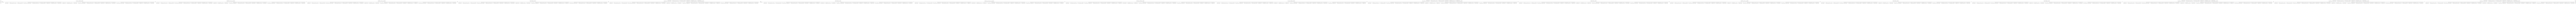

In [40]:
inicial_amplitudes = sym.solve(vecX_posicionesIniciales, a_11, a_21)
inicial_amplitudes

In [41]:
vecX_final = vecX_fases.subs(inicial_amplitudes)
vecX_final

       ⎡                                                                      
       ⎢                                                        ⎛             
       ⎢                                                        ⎜             
       ⎢                                                        ⎜             
       ⎢                                                        ⎜─────────────
       ⎢                                                        ⎜             
       ⎢                                                        ⎜  2   2      
       ⎢                                                        ⎝k₁ ⋅m₂  - 2⋅k
       ⎢                                                                      
⎡x₁⎤   ⎢                                                                      
⎢  ⎥ = ⎢          ⎛                                                           
⎣x₂⎦   ⎢          ⎜                                                           
       ⎢          ⎜                                 

Se establecen parámetros físicos del sistema.

In [42]:
parametros = {
    m1 : 20,
    m2 : 10,
    k1 : 20000,
    k2 : 13200,
    c1 : 200,
    c2 : 350,
} # [kg], [N m-1], [N m-1 s]

Se establecen posiciones iniciales $x_1(t=0), x_2(t=0)$

In [43]:
posicionesIniciales = {
    x1.subs(t,0) : 0.5,
    x2.subs(t,0) : 1.0,
} # [m]
posicionesIniciales

In [44]:
vecX_parametros = vecX_final.subs(parametros).subs(posicionesIniciales)
vecX_parametros

       ⎡                                                                      
       ⎢              ⎛        43824000000.0                  528000000.0⋅√900
       ⎢              ⎜────────────────────────────── + ──────────────────────
       ⎢              ⎝272000000⋅√9001 + 144016000000   272000000⋅√9001 + 1440
⎡x₁⎤   ⎢                                                                      
⎢  ⎥ = ⎢                                                                      
⎣x₂⎦   ⎢                     ⎛        43824000000.0                  528000000
       ⎢(68000 + 4000⋅√9001)⋅⎜────────────────────────────── + ───────────────
       ⎢                     ⎝272000000⋅√9001 + 144016000000   272000000⋅√9001
       ⎢──────────────────────────────────────────────────────────────────────
       ⎣                                                        264000        

             ⎛    _____________________⎞                                      
1       ⎞    ⎜t⋅╲╱ 596000 - 4000⋅√9001 ⎟   ⎛       

## Graficación

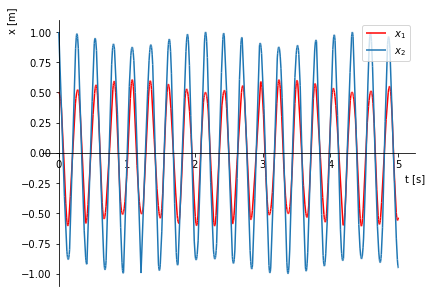

In [45]:
graficaUno = sym.plot(vecX_parametros.rhs[0], vecX_parametros.rhs[1],
                      (t, 0, 5), ylabel='x [m]', xlabel='t [s]', legend=True, show=False)
graficaUno[0].line_color='r'
graficaUno[0].label='$x_1$'
graficaUno[1].label='$x_2$'
graficaUno.show()

Evidentemente el haber establecido $x_1(0), x_2(0)$ con el mismo signo terminó excitando en mayor medida el primer modo con las dos $x_i$ desplazandose hacia el mismo lado.
Ahora sería interesante hacer lo opuesto, excitar exclusivamente el 2.o modo.
Para eso averiguaremos que posiciones iniciales hacen eso.
En la siguiente expresión

In [46]:
vecX_posicionesIniciales

          ⎡                                                                   
          ⎢                                                                   
          ⎢       ⎛                           ________________________________
⎡x₁(0)⎤   ⎢       ⎜                          ╱   2   2                        
⎢     ⎥ = ⎢a_{11}⋅⎝-k₂⋅m₁ + m₂⋅(k₁ + k₂) + ╲╱  k₁ ⋅m₂  - 2⋅k₁⋅k₂⋅m₁⋅m₂ + 2⋅k₁⋅
⎣x₂(0)⎦   ⎢───────────────────────────────────────────────────────────────────
          ⎢                                                   2⋅k₂⋅m₂         
          ⎢                                                                   
          ⎣                                                                   

                               a_{11} + a_{21}                                
                                                                              
_________________________________________⎞                                    
     2     2   2       2           2   2 ⎟         

se establece

In [47]:
vecX_posicionesIniciales_solo2doModo = vecX_posicionesIniciales.subs([(a_11, 0), (a_21, 1)])
vecX_posicionesIniciales_solo2doModo

          ⎡                                                 1                 
          ⎢                                                                   
⎡x₁(0)⎤   ⎢                                             -2⋅k₂⋅m₁              
⎢     ⎥ = ⎢───────────────────────────────────────────────────────────────────
⎣x₂(0)⎦   ⎢                           ________________________________________
          ⎢                          ╱   2   2                             2  
          ⎣k₁⋅m₂ - k₂⋅m₁ + k₂⋅m₂ + ╲╱  k₁ ⋅m₂  - 2⋅k₁⋅k₂⋅m₁⋅m₂ + 2⋅k₁⋅k₂⋅m₂  +

                                 ⎤
                                 ⎥
                                 ⎥
─────────────────────────────────⎥
_________________________________⎥
   2   2       2           2   2 ⎥
 k₂ ⋅m₁  + 2⋅k₂ ⋅m₁⋅m₂ + k₂ ⋅m₂  ⎦

y se reemplazan estas $x_1(0), x_2(0)$ en la solución general que parte del reposo.

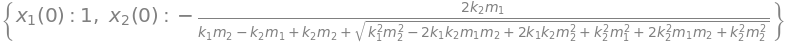

In [48]:
posicionesIniciales_solo2doModo = {
    x1.subs(t,0) : vecX_posicionesIniciales_solo2doModo.rhs[0],
    x2.subs(t,0) : vecX_posicionesIniciales_solo2doModo.rhs[1],
}
posicionesIniciales_solo2doModo

Substituyendo los parámetros en la expresión se hace evidente que con $x_1(0)$ extendiendose a un lado, $x_2(0)$ lo hace hacia el otro.

In [49]:
posicionesIniciales_solo2doModo[x1.subs(t,0)], posicionesIniciales_solo2doModo[x2.subs(t,0)].subs(parametros).evalf()

In [50]:
vecX_solo2doModo = vecX_final.subs(posicionesIniciales_solo2doModo).subs(parametros)
vecX_solo2doModo

       ⎡                                                                      
       ⎢              ⎛                  278784000000000⋅√9001                
       ⎢              ⎜- ─────────────────────────────────────────────────────
       ⎢              ⎝  (68000 + 4000⋅√9001)⋅(272000000⋅√9001 + 144016000000)
⎡x₁⎤   ⎢                                                                      
⎢  ⎥ = ⎢                                                                      
⎣x₂⎦   ⎢                     ⎛                  278784000000000⋅√9001         
       ⎢(68000 + 4000⋅√9001)⋅⎜- ──────────────────────────────────────────────
       ⎢                     ⎝  (68000 + 4000⋅√9001)⋅(272000000⋅√9001 + 144016
       ⎢──────────────────────────────────────────────────────────────────────
       ⎣                                                                      

                                                                              
                      4739328000000000             

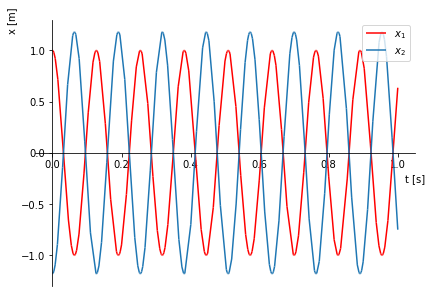

In [51]:
grafica_solo2doModo = sym.plot(vecX_solo2doModo.rhs[0], vecX_solo2doModo.rhs[1],
                      (t, 0, 1), ylabel='x [m]', xlabel='t [s]', legend=True, show=False)
grafica_solo2doModo[0].line_color='r'
grafica_solo2doModo[0].label='$x_1$'
grafica_solo2doModo[1].label='$x_2$'
grafica_solo2doModo.show()

Puede verse que la frecuencia es mucho mayor.
La escala tiene $1/5$ de la extensión de la anterior.
Es decir, que partir de las amplitudes relativas propias de $\omega_2$ hace que el sistema oscile con tal frecuencia superior a $\omega_1$.